In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family']='serif'
plt.rcParams['text.usetex'] = False
import pandas as pd
import sqlite3
from plotter import *
import glob, os
import seaborn as sb

In [2]:
def get_objective(conn):
    """
    Retrieves the objective function
    """
    cursor = conn.cursor()
    command = "SELECT * FROM Output_Objective"
    cursor.execute(command)
    obj_value = cursor.fetchall()[0][-1]
    
    return obj_value

In [4]:
path = 'simulations/illinois/least_cost_RE_sensitivity/data_files/*V2.sqlite'
data_files = glob.glob(path, recursive=True)
data_files.sort()
data_files.append('simulations/illinois/data_files/IL_CC30_52.sqlite')
data_files

['simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2010_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2011_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2012_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2013_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2014_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2015_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2016_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2017_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2018_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S2010_W2019_52_V2.sqlite',
 'simulations/illinois/least_cost_RE_sensitivity/data_files/IL_LC_S201

In [5]:
region = 'IL'
comm = 'ELC'
frames = []
for file in data_files:
    conn = sqlite3.connect(file)
    df = get_annual_capacity(conn, region, comm)
    final_year = df[df.index==2050]
    final_year['Objective_Value'] = get_objective(conn)
    frames.append(final_year)
df = pd.concat(frames)

<ipython-input-5-310931bd8ef3>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_year['Objective_Value'] = get_objective(conn)


In [6]:
df.fillna(0, inplace=True)
df

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
year,,,,,,,,
2050,2255.6,11058.1540,688.8,13784.326,12420.0,9340.4168,4058.7424,131746.403869
2050,2255.6,10671.3030,688.8,14019.179,12420.0,9613.8866,3923.7782,131503.695325
2050,2255.6,9169.2782,688.8,14957.058,12420.0,7306.1959,2109.3506,131311.153961
2050,2255.6,11372.1430,688.8,13659.566,12420.0,10495.9920,3772.5392,131375.315240
2050,2255.6,9953.9907,688.8,14707.616,12420.0,7408.4462,2514.6806,131828.548275
...,...,...,...,...,...,...,...,...
2050,2255.6,9436.0246,688.8,15125.009,12420.0,7350.9709,1248.9829,132069.261558
2050,2255.6,9400.7025,688.8,15254.660,12420.0,6877.2907,1067.0837,132668.701118
2050,2255.6,10204.7880,688.8,14477.939,12420.0,9185.7417,2612.8233,132237.766942


In [7]:
df.describe()

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM,Objective_Value
count,1.220000e+02,122.000000,1.220000e+02,122.000000,122.0,122.000000,122.000000,122.000000
mean,2.255600e+03,9775.095735,6.888000e+02,14616.351779,12420.0,8599.166032,2313.492991,131945.664302
std,3.196358e-12,662.297963,1.598179e-12,551.923631,0.0,1638.464031,988.639023,613.661057
min,2.255600e+03,8360.897200,6.888000e+02,11438.562000,12420.0,5938.186000,360.774100,127976.360033
25%,2.255600e+03,9308.563000,6.888000e+02,14339.597000,12420.0,7379.307100,1611.924975,131621.715079
50%,2.255600e+03,9749.902150,6.888000e+02,14612.081000,12420.0,8482.625950,2345.532250,131959.777131
75%,2.255600e+03,10204.038000,6.888000e+02,15010.442750,12420.0,9398.850925,2975.919550,132367.965956
max,2.255600e+03,11372.143000,6.888000e+02,15599.656000,12420.0,18864.328000,7214.299600,133309.575666


In [8]:
techs = ['COAL_CONV',
 'LI_BATTERY',
 'NATGAS_CONV',
 'NUCLEAR_CONV',
 'SOLAR_FARM',
 'WIND_FARM',
 'NUCLEAR_ADV']

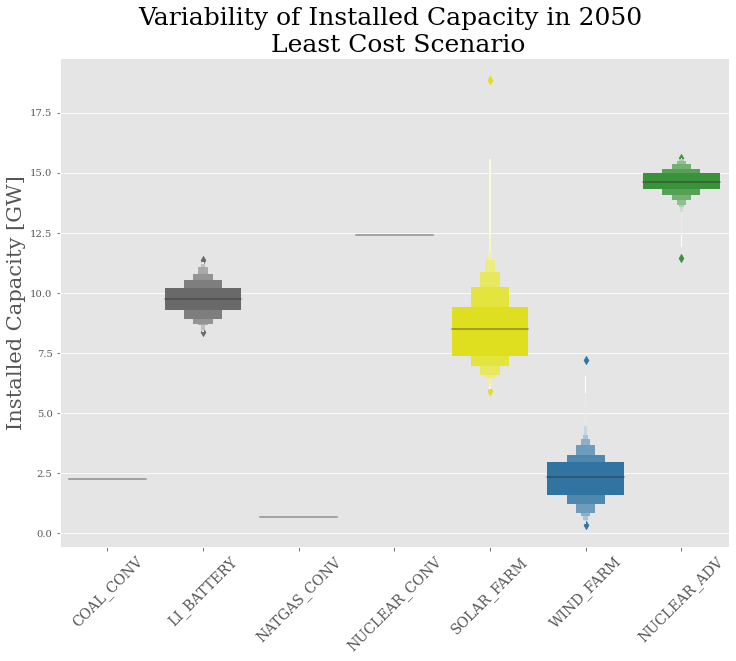

In [9]:
# plt.style.use('seaborn')
plt.figure.figsize = (12,9)
# (df[techs]/1000).boxplot()
sb.boxenplot(data=(df[techs]/1000), palette=elc_colors)

plt.title('Variability of Installed Capacity in 2050 \n Least Cost Scenario', fontsize=25)
plt.ylabel('Installed Capacity [GW]', fontsize=21)
plt.xticks(fontsize=14, rotation=45)
plt.show()

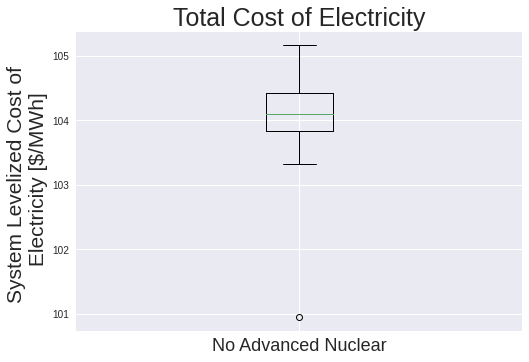

In [10]:
demand = 1267698.8
plt.style.use('seaborn')
plt.figure.figsize = (12,9)
plt.boxplot(df['Objective_Value']/demand*1000)

plt.title('Total Cost of Electricity', fontsize=25)
plt.ylabel('System Levelized Cost of \n Electricity [$/MWh]', fontsize=21)
plt.xticks([1],['No Advanced Nuclear'],fontsize=18)
plt.show()

In [11]:
(df['Objective_Value']).to_csv('data/objective_value_LC_V2.csv')

In [12]:
df = df.reset_index().drop(columns='year')

<AxesSubplot:>

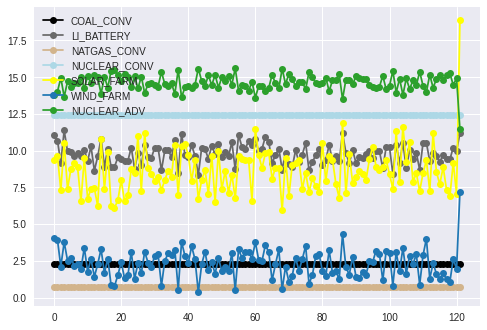

In [13]:
(df[techs]/1000).plot(marker='o', color=elc_colors)

The plot above suggests that biomass is useful when there is slightly less penetration of VREs. Biomass serves as baseload power and is relatively inflexible.

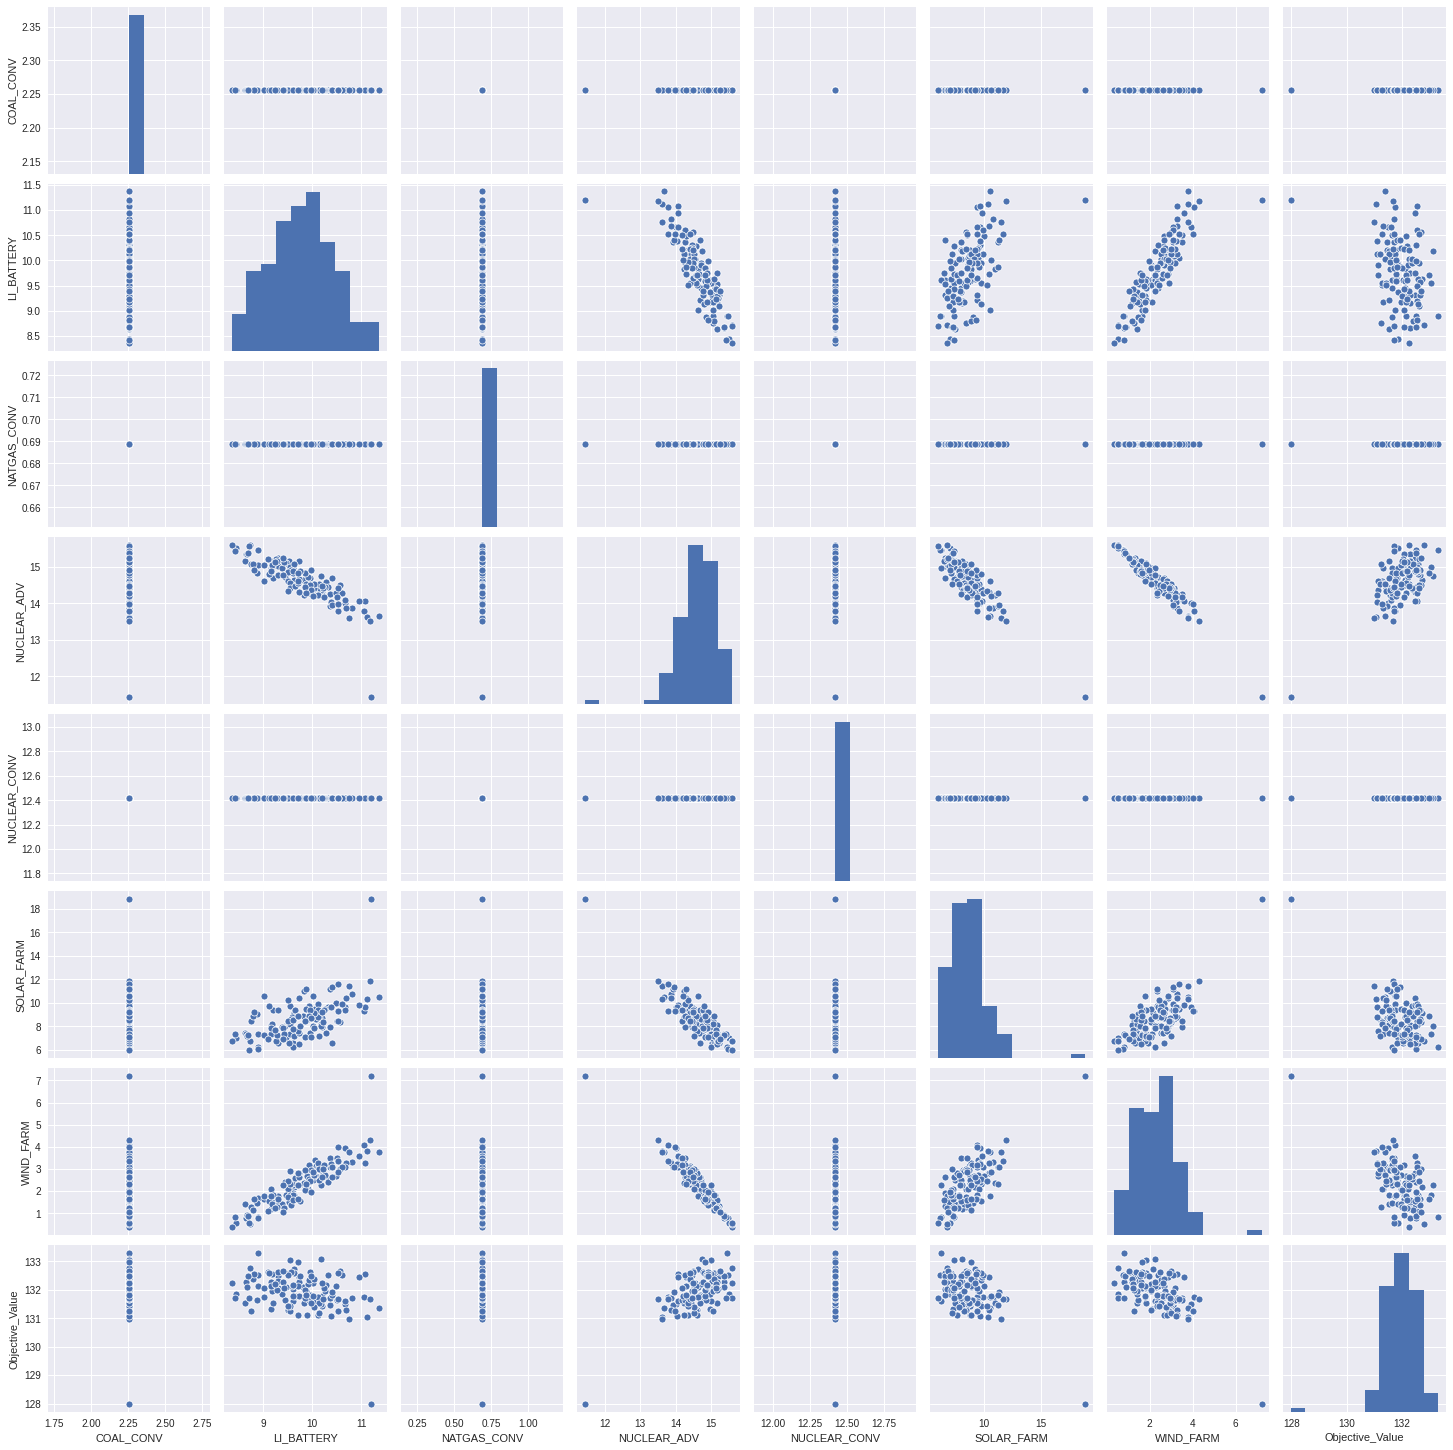

In [14]:
sb.pairplot(df/1000)

In [15]:
conn = sqlite3.connect(data_files[0])
fulldf = get_annual_capacity(conn, region, comm)
for i,file in enumerate(data_files):
    if i == 0:
        continue
    conn = sqlite3.connect(file)
    inter_df = get_annual_capacity(conn, region, comm)
    frames = [fulldf, inter_df]
    fulldf = pd.concat(frames)

In [16]:
fulldf.fillna(0, inplace=True)
fulldf

,COAL_CONV,LI_BATTERY,NATGAS_CONV,NUCLEAR_ADV,NUCLEAR_CONV,SOLAR_FARM,WIND_FARM
year,,,,,,,
2025,7505.90,453.06838,16371.60,1079.4086,12420.0,267.2000,6294.8200
2030,5045.24,9856.90500,16332.70,9166.0295,12420.0,8284.5726,5615.4600
2035,2815.74,9840.82500,15903.98,10616.8290,12420.0,8263.7526,3614.7323
2040,2444.40,9551.60620,5023.32,12055.6510,12420.0,8245.8126,2956.3398
2045,2357.04,10152.04400,688.80,13046.9320,12420.0,8421.8030,3282.1698
...,...,...,...,...,...,...,...
2030,5045.24,8686.66120,16332.70,8215.7851,12420.0,13475.1550,5615.4600
2035,2815.74,9004.93030,15903.98,9430.0186,12420.0,13454.3350,4998.1787
2040,2444.40,9274.14580,5023.32,10589.5310,12420.0,13436.3950,4969.0348


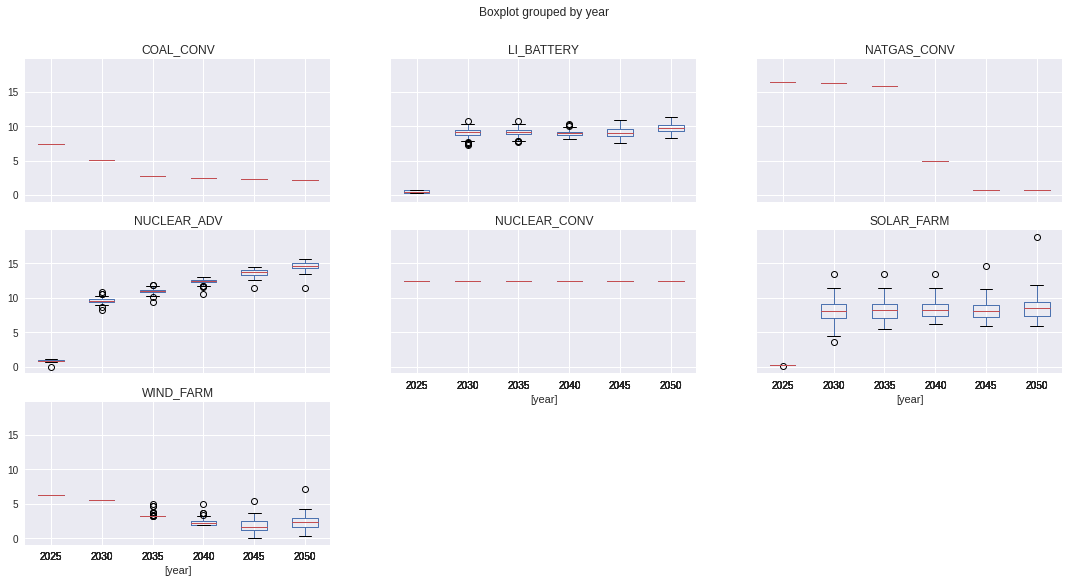

In [17]:
(fulldf/1000).boxplot(by='year', figsize=(18,9))
plt.xlabel('Installed Capacity [GW]')
plt.show()

In [18]:
conn = sqlite3.connect('simulations/illinois/data_files/IL_CC30_52.sqlite')

In [19]:
get_objective(conn)

127976.36003250397

In [20]:
(df[techs]/1000).to_csv('data/results/installed_capacity_2050_LC_V2.csv')
(fulldf[techs]/1000).to_csv('data/results/installed_capacity_full_LC_V2.csv')